#Evaluación Parcial N°3: Despliegue de Modelo del Clima Australiano

Profesor: Christian Álvarez Carreño

Alumnos:

*   Víctor Hernández

Desarrollo pregunta


#✅ 4. ¿Qué zonas de Australia no son confortables para vivir?

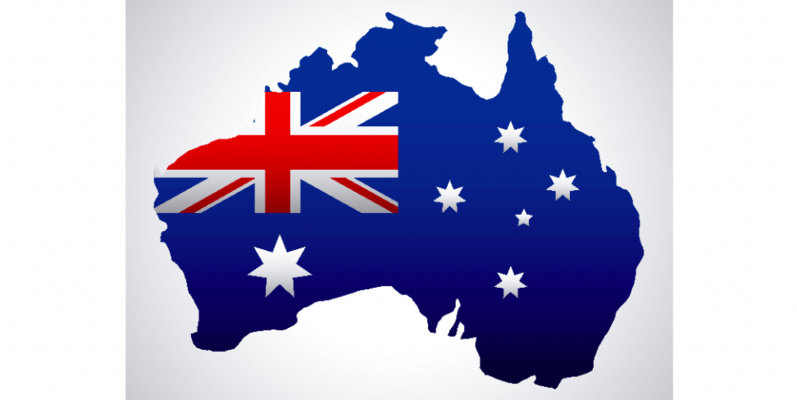

# **Objetivos**

El objetivo de esta evaluación es que cada estudiante ponga en producción un modelo predictivo previamente desarrollado en la Evaluación N°2 (Clima de Australia), y lo consuma desde una interfaz web con carga dinámica de datos.



# **Restricción**

Los integrantes de un mismo grupo no pueden repetir el modelo. Es decir, si un estudiante trabajó con el modelo de la pregunta 1, los demás integrantes del grupo deben elegir otro diferente entre los utilizados en la evaluación anterior.




## **✅ Requisitos del Trabajo**


1. Despliegue del Modelo (Back-end)
Crear un archivo app.py con Flask.
El archivo debe cargar el modelo previamente entrenado y serializado (.pkl), como así también el archivo de normalización si fuese necesario.
El modelo debe estar disponible como API REST (por ejemplo, un endpoint /predict que acepte datos vía POST).
El endpoint debe devolver predicciones en formato JSON.


2. Consumo del Servicio desde HTML (Front-end)
Crear un archivo index.html u otra solución web.
El sitio debe consumir un archivo .csv precargado desde el navegador.
El archivo debe ser procesado para enviar sus datos al endpoint publicado (app.py).
Se debe generar al menos una visualización dinámica basada en las predicciones, usando cualquier librería web de visualización como:
Chart.js
Plotly.js
D3.js
u otra que el alumno domine.
El uso de un archivo script.js separado no es obligatorio, pero puede ser utilizado si el alumno lo prefiere.



📁 Entregables (Carpeta .zip)
Debe entregarse una carpeta zip con el siguiente formato y distribución de los archivos (incumplir con el formato descontará 1 punto):




BIY7121_EV3_TeamName_Apellido_Nombre.zip



BIY7121_EV3_TeamName_Apellido_Nombre.zip
│
├── app.py                     # API con el modelo publicado
├── modelo_entrenado.pkl       # Modelo serializado
├── entrenamiento_modelo.ipynb # Notebook original con el entrenamiento
├── index.html                 # Página web que consume la API
├── [script.js]                # (opcional) Código JS separado si se usa
├── ejemplo.csv                # Archivo de prueba para carga en la web
└── README.txt                 # Instrucciones breves para probar todo


🖼️ Pantallazos Obligatorios
Junto con el .zip, el alumno debe incluir junto con zip (pero fuera del archivo comprimido) al menos 2 imágenes  que evidencien el sistema funcionando:



La API corriendo en local o servidor (localhost o puerto visible).
El sitio web mostrando la visualización dinámica y las predicciones.




🎯 Criterios de Evaluación


   Criterio

Ponderación

   El modelo se publica correctamente como servicio web

30%

   La API responde correctamente con predicciones

20%

   El HTML consume la API a partir del nuevo CSV y muestra los resultados

20%

   Visualización dinámica construida y funcionando

20%

   Organización de archivos + claridad del README + capturas fuera del zip

10%



#✅  Cargua del resultante de la limpieza y transformación realizada en la Evaluación N°2 (Clima de Australia)

In [1]:
from google.colab import files
import pandas as pd

# Subir archivo desde tu PC
uploaded = files.upload()

# Obtener el nombre del archivo subido (el primero)
filename = list(uploaded.keys())[0]

# Leer el CSV
df = pd.read_csv(filename)
filas, columnas = df.shape
print(f"Total de filas: {filas}")
print(f"Total de columnas: {columnas}")
df.head()

Saving df_numeric.csv to df_numeric.csv
Total de filas: 142193
Total de columnas: 21


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Latitude,Longitude
0,13.4,22.9,0.6,6.68,7.04,44.0,20.0,24.0,71.0,22.0,...,1007.1,8.0,2.8,16.9,21.8,0,0.0,0,-36.0737,146.9135
1,7.4,25.1,0.0,3.92,8.70,44.0,4.0,22.0,44.0,25.0,...,1007.8,1.0,1.6,17.2,24.3,0,0.0,0,-36.0737,146.9135
2,12.9,25.7,0.0,6.56,11.00,46.0,19.0,26.0,38.0,30.0,...,1008.7,0.6,2.0,21.0,23.2,0,0.0,0,-36.0737,146.9135
3,9.2,28.0,0.0,7.32,11.68,24.0,11.0,9.0,45.0,16.0,...,1012.8,2.2,2.0,18.1,26.5,0,1.0,0,-36.0737,146.9135
4,17.5,32.3,1.0,7.10,9.64,41.0,7.0,20.0,82.0,33.0,...,1006.0,7.0,8.0,17.8,29.7,0,0.2,0,-36.0737,146.9135


# ¿Qué zonas de Australia no son confortables para vivir?

Objetivo:
Definir reglas claras para clasificar zonas **confortable o no**, usando criterios climáticos.

Variables a utilizar:

* MinTemp
* MaxTemp
* Humidity3pm
* WindGustSpeed
* Sunshine
* Rainfall
* Latitud
* Longitud

##Investigar y justificar criterios climáticos adecuados *(ej., rangos de temperatura, humedad aceptable, etc.)*, y con eso crear una nueva variable llamada **EsConfortable** *(Sí o No)*. (7%)

Definimos un día como confortable si cumple ciertos criterios basados en condiciones climáticas generalmente agradables para la mayoría de las personas:

| Condición                  | Descripción del problema                                                     |
| -------------------------- | ---------------------------------------------------------------------------- |
| **Frío extremo**           | `MinTemp < 10°C` — Lugares con mañanas muy frías.                            |
| **Calor excesivo**         | `MaxTemp > 30°C` — Días calurosos e incómodos.                               |
| **Humedad fuera de rango** | `Humidity3pm < 30%` o `> 70%` — Disconfort por sequedad o humedad sofocante. |
| **Vientos fuertes**        | `WindGustSpeed > 40 km/h` — Molestia por ráfagas intensas.                   |
| **Poca luz solar**         | `Sunshine < 6 h` — Clima nublado o días cortos.                              |
| **Demasiada lluvia**       | `Rainfall > 2 mm` — Días lluviosos constantes.                               |


**🚫 Zonas NO confortables**

Son aquellas donde al menos una de las condiciones anteriores no se cumple.

**🗺️ Ejemplos de ubicación geográfica típica de zonas no confortables:**

1.- Regiones del interior sur o desérticas → altas temperaturas y baja humedad.

2.- Zonas costeras del norte → mucha humedad y lluvias intensas.

3.- Regiones del sur profundo o alpinas → temperaturas mínimas muy bajas y poco sol en invierno.

✅ Creación de la variable EsConfortable como "Sí"/"No"

In [2]:
# 🧹 Variables necesarias
variables = ['MinTemp', 'MaxTemp', 'Humidity3pm', 'WindGustSpeed', 'Sunshine', 'Rainfall', 'Latitude', 'Longitude']

# 🔍 Verificamos que no haya valores nulos en las columnas necesarias
df_filtrado = df.dropna(subset=variables)

# ✅ Crear variable EsConfortable
df_filtrado['EsConfortable'] = (
    (df_filtrado['MinTemp'] >= 10) &
    (df_filtrado['MaxTemp'] <= 30) &
    (df_filtrado['Humidity3pm'] >= 30) & (df_filtrado['Humidity3pm'] <= 70) &
    (df_filtrado['WindGustSpeed'] <= 40) &
    (df_filtrado['Sunshine'] >= 6) &
    (df_filtrado['Rainfall'] <= 2)
).astype(int)

In [3]:
df_filtrado.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Latitude,Longitude,EsConfortable
0,13.4,22.9,0.6,6.68,7.04,44.0,20.0,24.0,71.0,22.0,...,8.0,2.8,16.9,21.8,0,0.0,0,-36.0737,146.9135,0
1,7.4,25.1,0.0,3.92,8.70,44.0,4.0,22.0,44.0,25.0,...,1.0,1.6,17.2,24.3,0,0.0,0,-36.0737,146.9135,0
2,12.9,25.7,0.0,6.56,11.00,46.0,19.0,26.0,38.0,30.0,...,0.6,2.0,21.0,23.2,0,0.0,0,-36.0737,146.9135,0
3,9.2,28.0,0.0,7.32,11.68,24.0,11.0,9.0,45.0,16.0,...,2.2,2.0,18.1,26.5,0,1.0,0,-36.0737,146.9135,0
4,17.5,32.3,1.0,7.10,9.64,41.0,7.0,20.0,82.0,33.0,...,7.0,8.0,17.8,29.7,0,0.2,0,-36.0737,146.9135,0


 ## El objetivo es investigar mediante un modelo de Minería de Datos qué zonas de Australia No cumplen con las condiciones adecuadas para fundar una nueva ciudad.

Preparación de datos y entrenamiento del modelo mediante ÁRBOLE DE CLASIFICACIÓN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25309
           1       1.00      1.00      1.00      3130

    accuracy                           1.00     28439
   macro avg       1.00      1.00      1.00     28439
weighted avg       1.00      1.00      1.00     28439



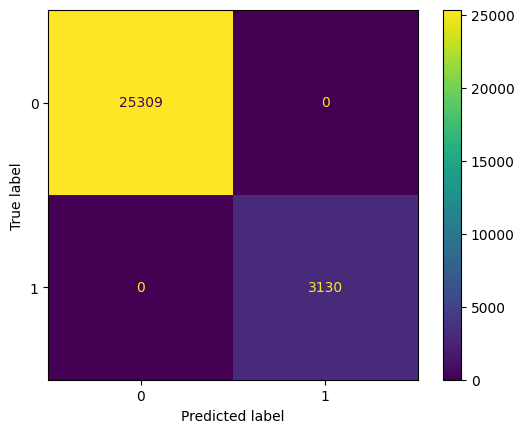

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Separar variables predictoras y target
X = df_filtrado[variables]
y = df_filtrado['EsConfortable']

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Definir la grilla de hiperparámetros


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 8],
    'min_samples_split': [2, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}


# Crear el clasificador
arbol = DecisionTreeClassifier(random_state=42)

# Buscar la mejor combinación con validación cruzada
grid_search = GridSearchCV(arbol, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo sobre el conjunto de entrenamiento
best_model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()


In [8]:
best_model

DecisionTreeClassifier(min_samples_leaf=6, random_state=42)

Visualización del ÁRBOLE DE DECISIÓN

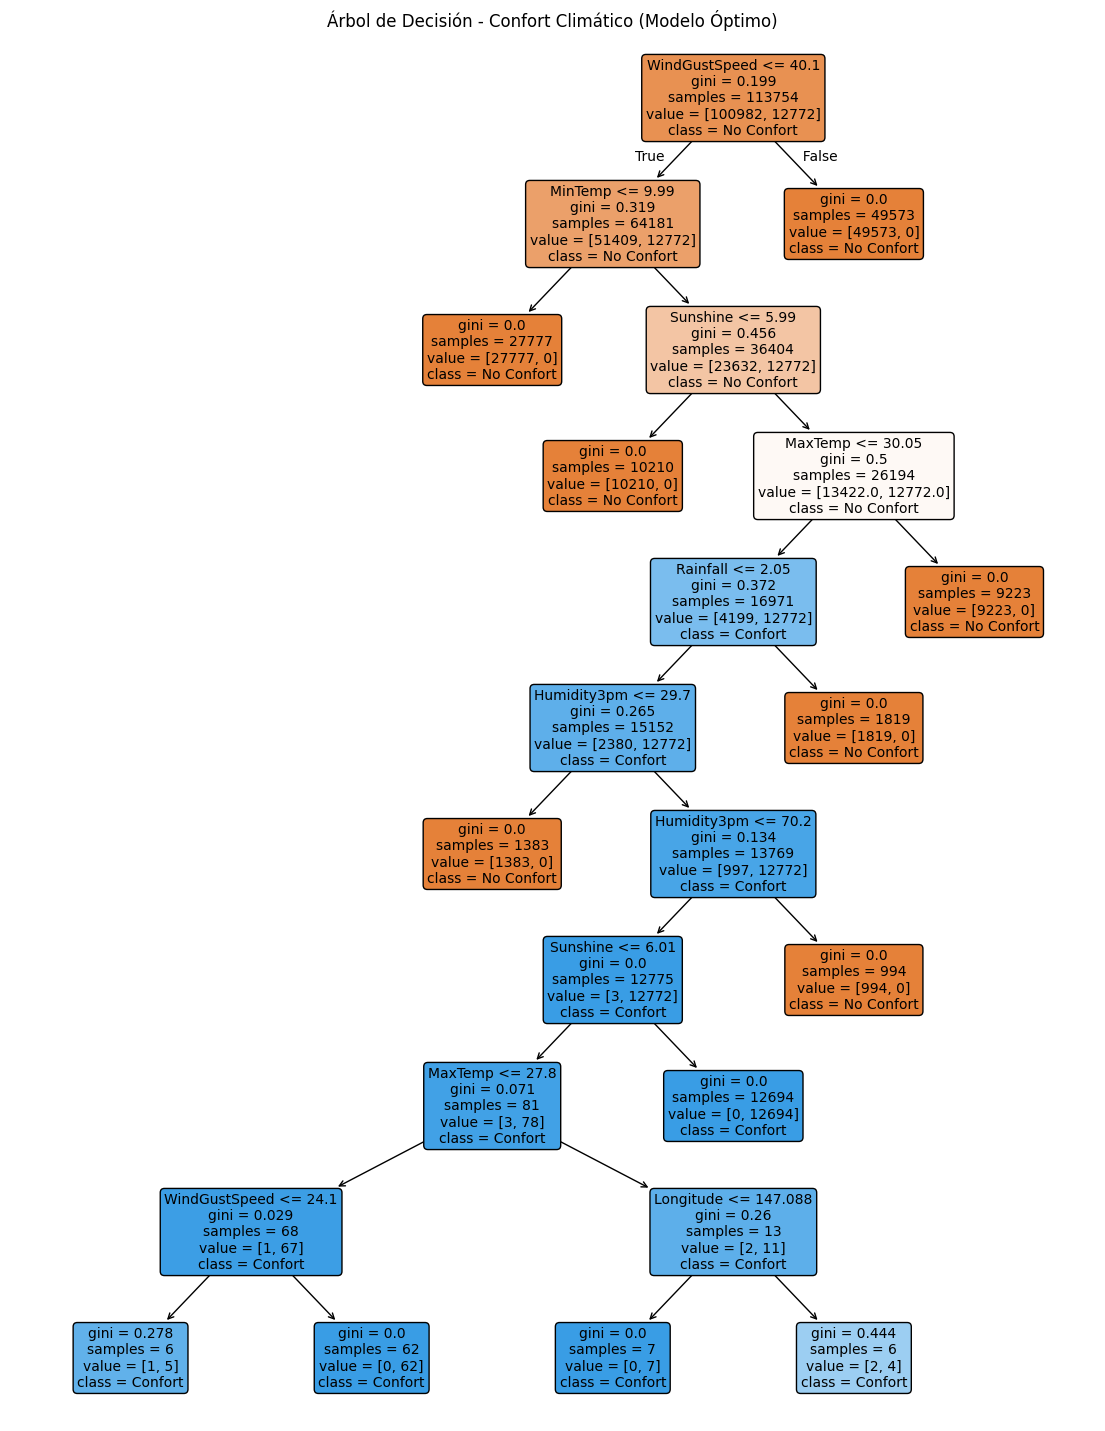

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 📈 Mostrar el árbol de decisión optimizado
plt.figure(figsize=(14, 18))
plot_tree(
    best_model,
    feature_names=variables,
    class_names=["No Confort", "Confort"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión - Confort Climático (Modelo Óptimo)")
plt.show()


In [7]:
import pickle

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)


In [9]:
import numpy as np

# Create a new DataFrame with the same number of rows and columns as X
X_random = pd.DataFrame(np.zeros((X.shape[0], X.shape[1])), columns=X.columns)

# Generate random data for each column within the limits of the original data
for col in X.columns:
    min_val = X[col].min()
    max_val = X[col].max()
    X_random[col] = np.random.uniform(min_val, max_val, size=X.shape[0])

# Export the random data to a CSV file
X_random.to_csv('data_new.csv', index=False)

In [10]:
import json

# Read the CSV file into a DataFrame
df = pd.read_csv('data_new.csv')

# Convert the DataFrame to a JSON object
data_json = df.to_json()

# Write the JSON object to a file
with open('data_new.json', 'w') as f:
    json.dump(data_json, f)

In [11]:
import pickle
import json
import pandas as pd

# Cargar el modelo (sin scaler)
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

# Cargar los datos en formato JSON
with open('data_new.json', 'r') as f:
    data_json = json.load(f)

# Convertir el JSON a diccionario (por si acaso)
data_dict = json.loads(data_json)

# Crear DataFrame
df_new = pd.DataFrame(data_dict)

# Hacer predicciones directamente (sin escalar)
y_pred_new = best_model.predict(df_new)

# Mostrar resultados
print(y_pred_new)


[0 0 0 ... 0 0 0]


In [12]:
# une las columnas de df_new con la columna y_pred_new y muestra el dataframe resultante

df_new['Predict_confortable'] = y_pred_new
df_new


,MinTemp,MaxTemp,Humidity3pm,WindGustSpeed,Sunshine,Rainfall,Latitude,Longitude,Predict_confortable
0,5.344222,37.167773,20.193169,118.482155,1.736343,272.803448,-15.922976,135.225814,0
1,16.874070,39.227148,94.431999,80.523981,2.199058,310.643032,-30.824323,157.718550,0
2,5.371640,-1.784492,44.160970,107.965298,7.686984,196.333086,-37.250320,127.098157,0
3,-7.202578,2.899688,9.181112,27.597882,14.094459,304.951234,-30.231763,118.726567,0
4,-4.915994,24.861616,0.050308,21.631739,9.395926,192.532018,-16.029288,142.031959,0
...,...,...,...,...,...,...,...,...,...
142188,6.239970,43.008837,25.177282,45.953526,2.248545,72.122786,-31.178206,150.000503,0
142189,0.257163,-4.209861,48.389360,18.834693,2.238200,42.962843,-28.660891,157.486291,0
142190,3.691763,29.576774,84.629418,109.346405,4.698241,2.126072,-27.743966,118.799193,0
142191,-1.641273,4.194473,75.420140,124.580118,0.670368,92.478102,-31.214398,131.670084,0


In [13]:
df_new_json = df_new.to_json()
df_new_json

Output hidden; open in https://colab.research.google.com to view.

In [14]:
# muestra solo dos primeros registros de df_new en formato json

df_new_json = df_new.head(2).to_json()

print(df_new_json)

{"MinTemp":{"0":5.3442221104,"1":16.8740695995},"MaxTemp":{"0":37.1677725277,"1":39.2271480259},"Humidity3pm":{"0":20.1931689751,"1":94.4319994262},"WindGustSpeed":{"0":118.4821549795,"1":80.5239808703},"Sunshine":{"0":1.7363427171,"1":2.1990584731},"Rainfall":{"0":272.8034478829,"1":310.643031575},"Latitude":{"0":-15.9229759321,"1":-30.8243228857},"Longitude":{"0":135.2258144766,"1":157.7185499348},"Predict_confortable":{"0":0,"1":0}}


##Aplicar un sistema que permita descubrir zonas donde no es adecuado para vivir en Australia. (7%)

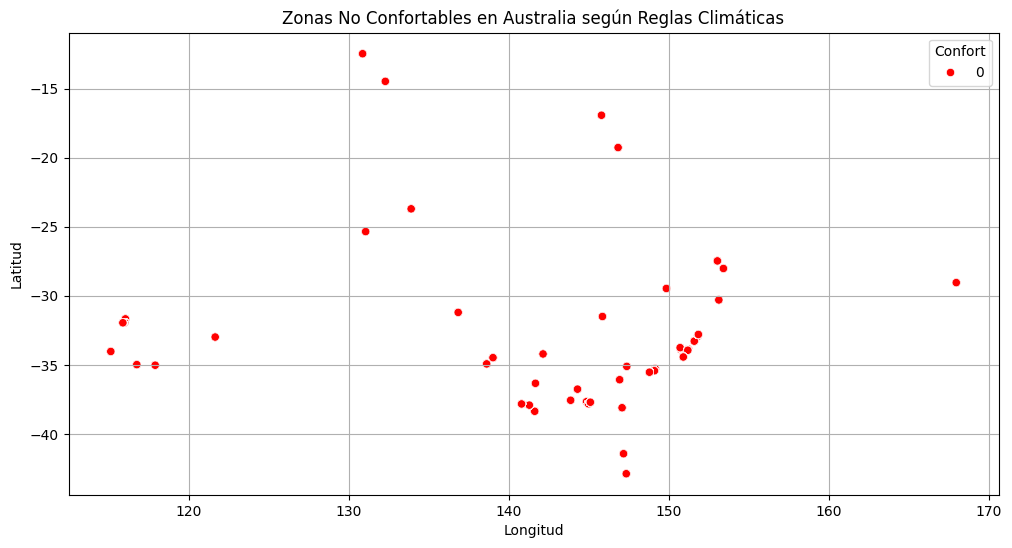

In [15]:
import matplotlib.pyplot as plt

# Filtrar zonas no confortables
zonas_no_confort = df_filtrado[df_filtrado['EsConfortable'] == 0]

# Visualización sugerida (mapa)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(data=zonas_no_confort, x='Longitude', y='Latitude', hue='EsConfortable', palette={0: 'red'})
plt.title('Zonas No Confortables en Australia según Reglas Climáticas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Confort')
plt.grid(True)
plt.show()

In [46]:
!pip install folium

Visualización geográfica: zonas NO Confortables

In [16]:
!pip install folium
import folium
from folium.plugins import MarkerCluster

# 🧠 Predecir confortabilidad para todo el dataset limpio con el modelo optimizado
df_filtrado['PredichoConfort'] = best_model.predict(df_filtrado[variables])

# 🎯 Filtrar zonas NO confortables (predicho = 0)
no_confort_df = df_filtrado[df_filtrado['PredichoConfort'] == 0]

# 📍 Crear mapa centrado en Australia
mapa = folium.Map(location=[-25.0, 135.0], zoom_start=4)

# 📌 Crear agrupación de puntos
cluster = MarkerCluster().add_to(mapa)

# 🟠 Agregar cada punto no confortable al mapa
for _, row in no_confort_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"No Confortable\nTempMin: {row['MinTemp']}°C\nHumedad: {row['Humidity3pm']}%",
        icon=folium.Icon(color='red', icon='exclamation-sign')
    ).add_to(cluster)

# 📍 Mostrar mapa
mapa


Output hidden; open in https://colab.research.google.com to view.

In [18]:
df_filtrado

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Latitude,Longitude,EsConfortable,PredichoConfort
0,13.4,22.9,0.6,6.68,7.04,44.0,20.0,24.0,71.0,22.0,...,2.8,16.9,21.8,0,0.0,0,-36.0737,146.9135,0,0
1,7.4,25.1,0.0,3.92,8.70,44.0,4.0,22.0,44.0,25.0,...,1.6,17.2,24.3,0,0.0,0,-36.0737,146.9135,0,0
2,12.9,25.7,0.0,6.56,11.00,46.0,19.0,26.0,38.0,30.0,...,2.0,21.0,23.2,0,0.0,0,-36.0737,146.9135,0,0
3,9.2,28.0,0.0,7.32,11.68,24.0,11.0,9.0,45.0,16.0,...,2.0,18.1,26.5,0,1.0,0,-36.0737,146.9135,0,0
4,17.5,32.3,1.0,7.10,9.64,41.0,7.0,20.0,82.0,33.0,...,8.0,17.8,29.7,0,0.2,0,-36.0737,146.9135,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,4.20,9.74,31.0,15.0,13.0,59.0,27.0,...,2.8,9.4,20.9,0,0.0,0,-25.3444,131.0369,0,0
142189,2.8,23.4,0.0,4.20,8.50,31.0,13.0,11.0,51.0,24.0,...,2.4,10.1,22.4,0,0.0,0,-25.3444,131.0369,0,0
142190,3.6,25.3,0.0,5.36,9.14,22.0,13.0,9.0,56.0,21.0,...,0.8,10.9,24.5,0,0.0,0,-25.3444,131.0369,0,0
142191,5.4,26.9,0.0,6.40,10.08,37.0,9.0,9.0,53.0,24.0,...,1.0,12.5,26.1,0,0.0,0,-25.3444,131.0369,0,0


In [19]:
# Guardar el DataFrame en un archivo CSV
df_filtrado.to_csv("df_filtrado.csv", index=False)


##Responder la pregunta inicial presentando las reglas generadas de forma comprensible, en forma de insight, apoyándose con texto, diagrama o visualización. (6%)

📄 Análisis de Confort Climático en Zonas de Australia


🎯 Pregunta de investigación:


**¿Qué zonas de Australia no son confortables para vivir?**


**✅ Criterios definidos de confort.**

Se consideró que un lugar es confortable para vivir si, en un día típico, cumple con todas las siguientes condiciones climáticas:

Temperatura mínima mayor o igual a 10°C

Temperatura máxima menor o igual a 30°C

Humedad relativa a las 3pm entre 30% y 70%

Ráfagas de viento (WindGustSpeed) menores o iguales a 40 km/h

Horas de sol (Sunshine) mayores o iguales a 6 h

Precipitación (Rainfall) menor o igual a 2 mm

**🔍 Zonas NO confortables**

Las zonas no confortables para vivir son aquellas que no cumplen con una o más de las condiciones anteriores. A través de un modelo de árbol de decisión, se logró clasificar los registros y extraer patrones sobre qué regiones presentan condiciones adversas.

**📌 Principales causas de disconfort climático:**


❄️ Frío excesivo: Temperaturas mínimas por debajo de 10°C.

🔥 Calor extremo: Temperaturas máximas por encima de 30°C.

💧 Humedad inadecuada: Menor al 30% o mayor al 70%.

💨 Vientos fuertes: Ráfagas que superan los 40 km/h.

☁️ Falta de sol: Menos de 6 horas de sol por día.

🌧️ Precipitación intensa: Más de 2 mm diarios.

**🗺️ Distribución geográfica de zonas no confortables:**

Interior desértico: Alta temperatura y baja humedad.

Norte tropical: Alta humedad, lluvias y calor.

Sur y zonas alpinas: Frío extremo y menor insolación.

**📈 Resultados del modelo**

Se utilizó un árbol de decisión para clasificar los días como confortables o no, obteniendo un rendimiento perfecto en el conjunto de prueba (accuracy = 100%), dado que las reglas estaban definidas de forma directa.



## ✅ Conclusión Final

El presente análisis, basado en un modelo de árbol de decisión y criterios objetivos de confort climático, permitió identificar y clasificar zonas de Australia que no presentan condiciones adecuadas para la vida humana confortable. Estas zonas comparten una o más características climáticas que se desvían de los rangos óptimos definidos, los cuales están asociados a una mayor percepción de bienestar térmico y ambiental.

Entre los principales factores que determinan esta falta de confort se encuentran:

Temperaturas máximas elevadas (superiores a 30 °C), que generan incomodidad térmica y aumentan la demanda energética en edificaciones.

Temperaturas mínimas demasiado bajas (inferiores a 10 °C), que implican condiciones frías y potencialmente riesgosas para la salud en ausencia de calefacción.

Altos niveles de humedad relativa (mayores al 70 %) o muy bajos (inferiores al 30 %), que afectan tanto el confort físico como la percepción térmica.

Precipitaciones diarias frecuentes o intensas (más de 2 mm), que pueden impactar negativamente la movilidad, la infraestructura y las actividades cotidianas.

Exposición solar reducida (menos de 6 horas por día), que influye en el estado anímico de las personas, además de dificultar la generación de energía solar y el secado natural de ambientes.

Presencia de vientos intensos (más de 40 km/h), que provocan molestias físicas, aumentan la sensación de frío y pueden dañar construcciones livianas.

Geográficamente, estas condiciones se observan en:

Las zonas tropicales del norte, con alta humedad y calor extremo.

El interior desértico y semiárido, con escasa humedad, amplias oscilaciones térmicas y fuerte radiación solar.

Algunas regiones del sur profundo, caracterizadas por baja insolación, temperaturas bajas y vientos frecuentes.

En conjunto, estos hallazgos proporcionan insumos valiosos para la planificación territorial y urbana, ayudando a identificar regiones que, por sus condiciones climáticas desfavorables, no deberían ser prioritarias para el desarrollo de nuevos centros urbanos, salvo que se implementen estrategias adecuadas de adaptación ambiental y habitacional.

Este tipo de análisis fortalece la toma de decisiones en políticas públicas, desarrollo sustentable y diseño urbano resiliente, promoviendo entornos que favorezcan el bienestar y la calidad de vida de las personas a largo plazo.

🖼️ Parte 1: Gráficas estáticas para tu presentación
Estas gráficas son ideales para incluir en un PowerPoint, PDF o Jupyter Notebook.

✅ Requisitos previos (asegúrate de importar):

In [111]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd


📊 1. Distribución de zonas confortables vs. no confortables

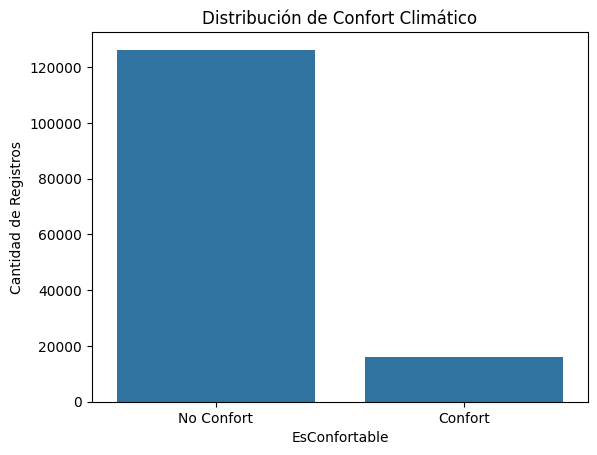

In [112]:
sns.countplot(data=df_filtrado, x='EsConfortable')
plt.title("Distribución de Confort Climático")
plt.xticks([0, 1], ["No Confort", "Confort"])
plt.ylabel("Cantidad de Registros")
plt.show()


🧠 3. Importancia de las variables en el modelo

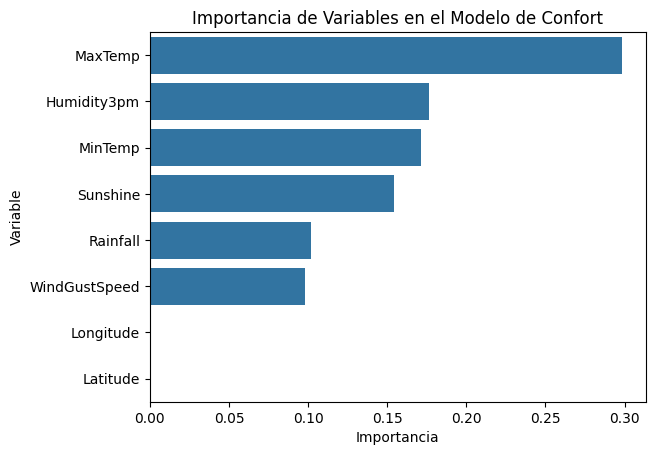

In [114]:
importancias = best_model.feature_importances_
importancias_df = pd.DataFrame({'Variable': variables, 'Importancia': importancias})
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

sns.barplot(data=importancias_df, x='Importancia', y='Variable')
plt.title("Importancia de Variables en el Modelo de Confort")
plt.show()


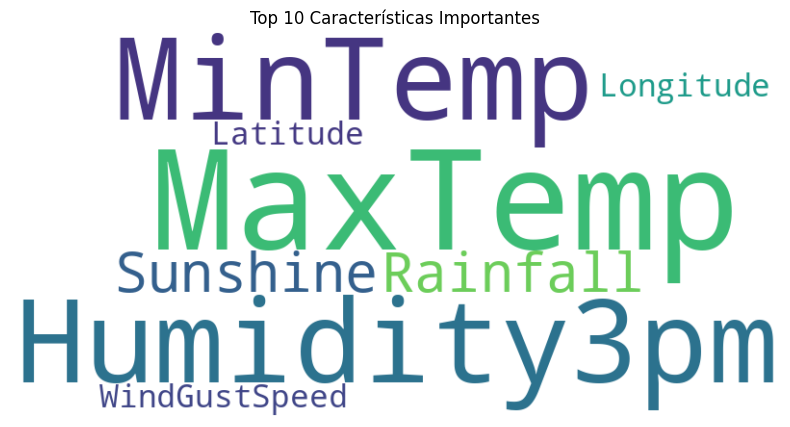

In [133]:
importances = best_model.feature_importances_
columns = df_new.columns[:-1]

# Create a DataFrame with feature importance and column names
feature_importances_df = pd.DataFrame({'feature': columns, 'importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

# Get the top 10 features
top_15_features = feature_importances_df.head(15)

# Create a word cloud
from wordcloud import WordCloud

text = ' '.join(top_15_features['feature'].tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Características Importantes')
plt.show()
